# CONSUMO DOMÉSTICO DE ENERGIA ELÉTRICA (EDA)

O dataset apresenta informações sobre o consumo de energia elétrica em residências da cidade Sceaux da França, com taxa de amostragem de um minuto durante o período de quase 4 anos. Ele possui 2075259 observações e 9 variáveis. O presente projeto seguirá os seguintes passos:

1. Plotar variáveis
2. Plotar relação entre potência ativa e as demais variáveis
3. Plotar série temporal com média diária de cada variável




**Dataset:** https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

## 1. CARREGANDO PACOTES E IMPORTANDO DADOS

In [1]:
# Carregando pacotes
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [2]:
# Importando dados
df= pd.read_csv("household_power_consumption.txt",sep=";",parse_dates={'DateTime':['Date','Time']},
                infer_datetime_format=True,na_values=['nan','?'],index_col="DateTime")

In [3]:
# Informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [4]:
# Visualizar as seis primeiras linhas do dataset
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
# Visualizar as seis últimas linhas do dataset
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [6]:
# Checar NAs
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

## 2. ANÁLISE EXPLORATÓRIA DOS DADOS

* Há 25979 valores nulos nas variáveis numéricas, como método de imputação iremos usar a média.

**Dicionário das Variáveis**

1. date: Date in format dd/mm/yyyy <br>
2. time: Time in format hh:mm:ss <br>
3. global_active_power: Household global minute-averaged active power (kW)<br>
4. global_reactive_power: Household global minute-averaged reactive power (kW)<br>
5. voltage: Minute-averaged voltage (Volts)<br>
6. global_intensity: Household global minute-averaged current intensity (Ampere)<br>
7. sub_metering_1: Energy sub-metering No. 1 (Wh). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).<br>
8. sub_metering_2: Energy sub-metering No. 2 (Wh). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.<br>
9. sub_metering_3: Energy sub-metering No. 3 (Wh). It corresponds to an electric water-heater and an air-conditioner.<br>


In [7]:
# Imputar média no lugar de NAs
cols=list(df.columns)
for col in cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [8]:
# Checar NAs pós imputação
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
# Estatística descritiva 
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.07526e+06,2.07526e+06,2.07526e+06,2.07526e+06,2.07526e+06,2.07526e+06,2.07526e+06
mean,1.09162,0.123714,240.84,4.62776,1.12192,1.29852,6.45845
std,1.05066,0.112014,3.21964,4.41649,6.1144,5.78547,8.38418
min,0.076,0,223.2,0.2,0,0,0
25%,0.31,0.048,239.02,1.4,0,0,0
50%,0.63,0.102,240.96,2.8,0,0,1
75%,1.52,0.192,242.86,6.4,0,1,17
max,11.122,1.39,254.15,48.4,88,80,31


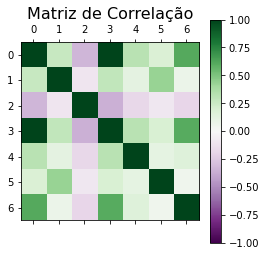

In [10]:
# Matriz de correlação
plt.matshow(df.corr(method="spearman"),vmax=1,vmin=-1,cmap='PRGn')
plt.title("Matriz de Correlação", size=16)
plt.colorbar()
plt.show()

### 2.1 Visualizando as variáveis

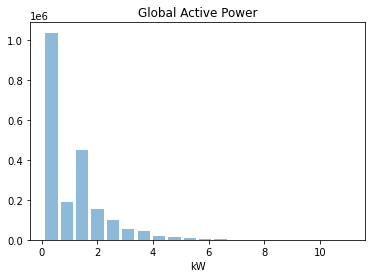

In [11]:
# Plotando variável Global_active_power
plt.hist(df["Global_active_power"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Global Active Power")
plt.xlabel("kW")
plt.show()

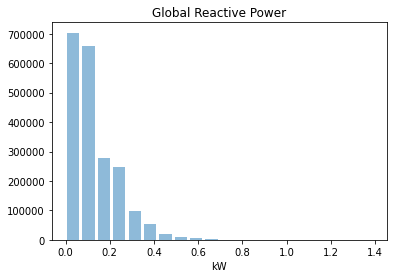

In [12]:
# Plotando variável Global_reactive_power
plt.hist(df["Global_reactive_power"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Global Reactive Power")
plt.xlabel("kW")
plt.show()

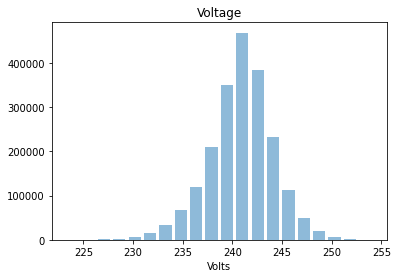

In [13]:
# Plotando variável Voltage
plt.hist(df["Voltage"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Voltage")
plt.xlabel("Volts")
plt.show()

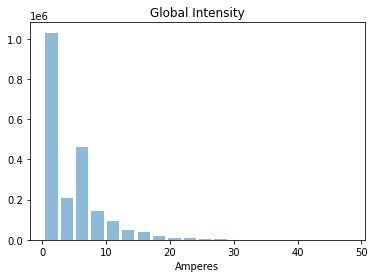

In [14]:
# Plotando variável Global_intensity
plt.hist(df["Global_intensity"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Global Intensity")
plt.xlabel("Amperes")
plt.show()

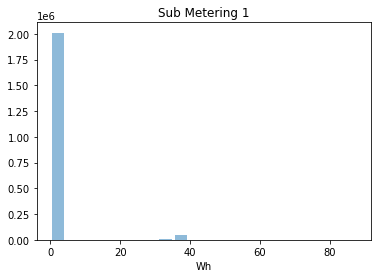

In [15]:
# Plotando variável Sub_metering_1
plt.hist(df["Sub_metering_1"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Sub Metering 1")
plt.xlabel("Wh")
plt.show()

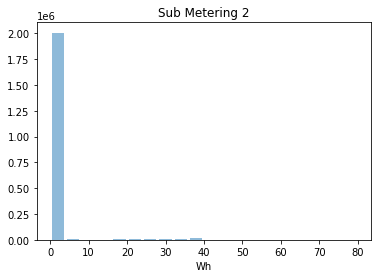

In [16]:
# Plotando variável Sub_metering_2
plt.hist(df["Sub_metering_2"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Sub Metering 2")
plt.xlabel("Wh")
plt.show()

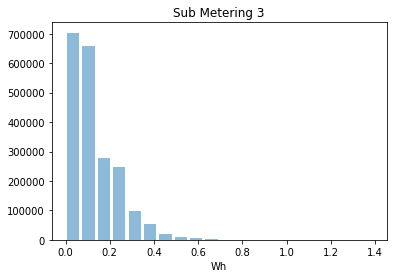

In [17]:
# Plotando variável Sub_metering_3
plt.hist(df["Global_reactive_power"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Sub Metering 3")
plt.xlabel("Wh")
plt.show()

 ### Visualizando a Relação entre Global Active Power e as demais variáveis

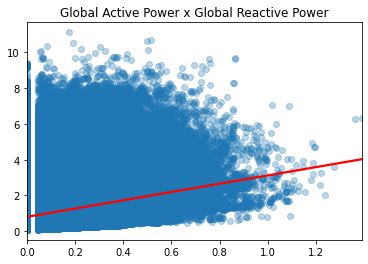

In [18]:
# Plotando relação Global active power e Global reactive power
sns.regplot(x="Global_reactive_power", y="Global_active_power", data=df,line_kws={"color": "red"},scatter_kws={'alpha':0.3})  
plt.title("Global Active Power x Global Reactive Power")
plt.ylabel("")
plt.xlabel("")
plt.show()

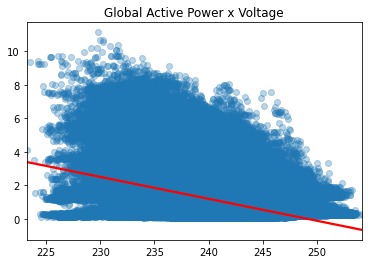

In [19]:
# Plotando relação Global active power e Voltage
sns.regplot(x="Voltage", y="Global_active_power", data=df,line_kws={"color": "red"},scatter_kws={'alpha':0.3})  
plt.title("Global Active Power x Voltage")
plt.ylabel("")
plt.xlabel("")
plt.show()

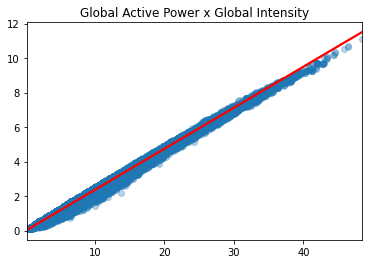

In [20]:
# Plotando relação Global active power e Global intensity
sns.regplot(x="Global_intensity", y="Global_active_power", data=df,line_kws={"color": "red"},scatter_kws={'alpha':0.3})  
plt.title("Global Active Power x Global Intensity")
plt.ylabel("")
plt.xlabel("")
plt.show()


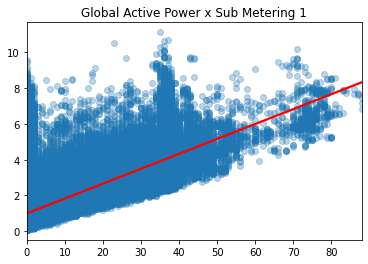

In [21]:
# Plotando relação Global active power e Sub metering 1
sns.regplot(x="Sub_metering_1", y="Global_active_power", data=df,line_kws={"color": "red"},scatter_kws={'alpha':0.3})  
plt.title("Global Active Power x Sub Metering 1")
plt.ylabel("")
plt.xlabel("")
plt.show()

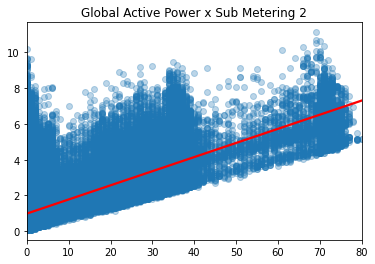

In [22]:
# Plotando relação Global active power e Sub metering 2
sns.regplot(x="Sub_metering_2", y="Global_active_power", data=df,line_kws={"color": "red"},scatter_kws={'alpha':0.3})  
plt.title("Global Active Power x Sub Metering 2")
plt.ylabel("")
plt.xlabel("")
plt.show()

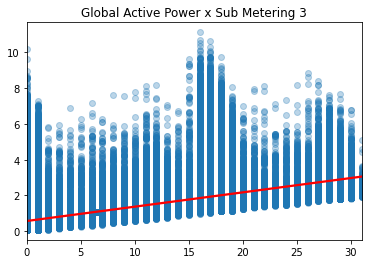

In [23]:
# Plotando relação Global active power e Sub metering 3
sns.regplot(x="Sub_metering_3", y="Global_active_power", data=df,line_kws={"color": "red"},scatter_kws={'alpha':0.3})  
plt.title("Global Active Power x Sub Metering 3")
plt.ylabel("")
plt.xlabel("")
plt.show()

## 2.3 Gráficos de séries temporais

* Os gráficos apresentam a média diária

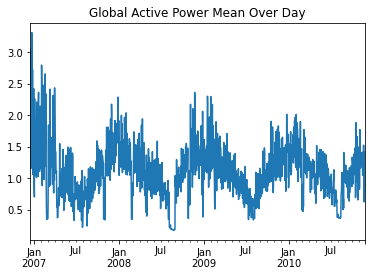

In [24]:
# Plotando média diária da variável Global active power
df.Global_active_power.resample("D").mean().plot()
plt.title("Global Active Power Mean Over Day")
plt.xlabel("")
plt.show()

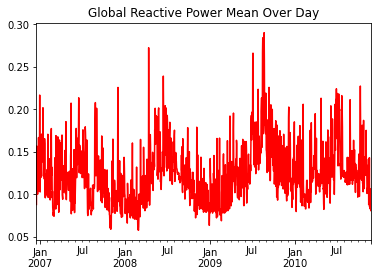

In [25]:
# Plotando média diária da variável  Global Reactive Power
df.Global_reactive_power.resample("D").mean().plot(color="red")
plt.title("Global Reactive Power Mean Over Day")
plt.xlabel("")
plt.show()

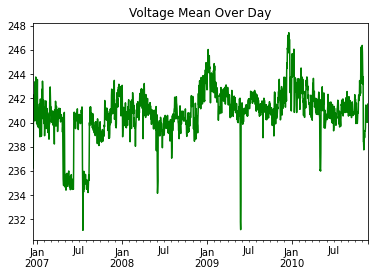

In [26]:
# Plotando média diária da variável Voltage
df.Voltage.resample("D").mean().plot(color="green")
plt.title("Voltage Mean Over Day")
plt.xlabel("")
plt.show()

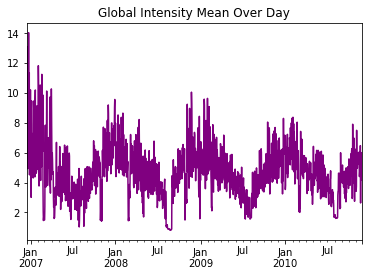

In [27]:
# Plotando média diária da variável Global intensity
df.Global_intensity.resample("D").mean().plot(color="purple")
plt.title("Global Intensity Mean Over Day")
plt.xlabel("")
plt.show()

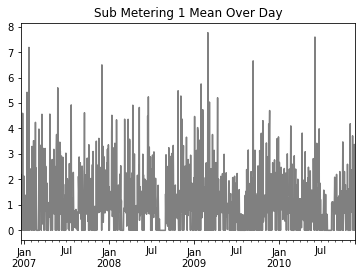

In [28]:
# Plotando média diária da variável Sub metering 1
df.Sub_metering_1.resample("D").mean().plot(color="grey")
plt.title("Sub Metering 1 Mean Over Day")
plt.xlabel("")
plt.show()

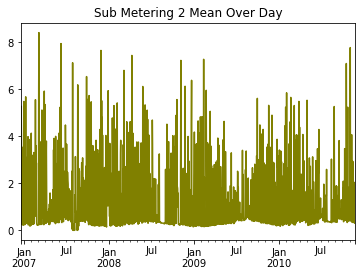

In [29]:
# Plotando média diária da variável Sub metering 2
df.Sub_metering_2.resample("D").mean().plot(color="olive")
plt.title("Sub Metering 2 Mean Over Day")
plt.xlabel("")
plt.show()

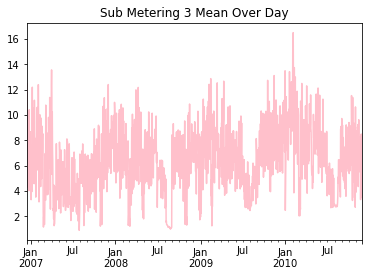

In [30]:
# Plotando média diária da variável Sub metering 3
df.Sub_metering_3.resample("D").mean().plot(color="pink")
plt.title("Sub Metering 3 Mean Over Day")
plt.xlabel("")
plt.show()